## Project Goals 
- This is the final project for my Data Analyst Career Path at Codecademy. The topic is inspired by the Netflix series "Drive To Survive" and Formula 1 itself. 
- The dataset comes from the open-source at [Kaggle](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020/discussion). Kudos to the author! It has many useful tables but we only focus on several ones as a starting point. Thus, it will be gradually expanded according to our new goals.
- The following resource was used for proof-checking - [GPRacingStats](https://gpracingstats.com/drivers/).

The main goal is to find out who are the most successful Formula 1 pilots and see what's important for winning the title.

NB: Nan values and point inconsistencies may be observed because of the long history of the racing competition and the rules that have changed over time.

#### Questions
1. Where do the most drivers come from? What countries have held the most grandprix?
2. Who has winned the most during one season?
3. How do wins change over years for them?
4. How many World Championship titles do they have?
5. How do their winning points change over years?
6. Who are the most experienced drivers?

In [69]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("Paired")

In [40]:
# Read the datasets
circuits = pd.read_csv("circuits.csv")
constructors = pd.read_csv("constructors.csv")
con_standings = pd.read_csv("constructor_standings.csv")
con_results = pd.read_csv("constructor_results.csv")
drivers = pd.read_csv("drivers.csv")
dr_standings = pd.read_csv("driver_standings.csv")
races = pd.read_csv("races.csv")
sprints = pd.read_csv("sprint_results.csv")

### Prepare Data
We will print samples of the current datasets to see how they are to be joined for analysis. After this, we'll form new datasets with the prefix `full` and erase the data samples.

In [41]:
# Merge tables for drivers
full_drivers = drivers.merge(dr_standings, on="driverId", how="inner")
# Concatenate full name
full_drivers["name"] = full_drivers[["forename", "surname"]].apply(" ".join, axis=1)
# Drop the extra columns and reposition
full_drivers = full_drivers.reindex(columns=["driverId", "driverRef", "number", "code", "name", "dob", "nationality", "raceId", "points", "position", "wins"])
full_drivers

,driverId,driverRef,number,code,name,dob,nationality,raceId,points,position,wins
0,1,hamilton,44,HAM,Lewis Hamilton,1985-01-07,British,18,10.0,1,1
1,1,hamilton,44,HAM,Lewis Hamilton,1985-01-07,British,19,14.0,1,1
2,1,hamilton,44,HAM,Lewis Hamilton,1985-01-07,British,20,14.0,3,1
3,1,hamilton,44,HAM,Lewis Hamilton,1985-01-07,British,21,20.0,2,1
4,1,hamilton,44,HAM,Lewis Hamilton,1985-01-07,British,22,28.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...
33877,856,de_vries,45,DEV,Nyck de Vries,1995-02-06,Dutch,1092,2.0,21,0
33878,856,de_vries,45,DEV,Nyck de Vries,1995-02-06,Dutch,1093,2.0,21,0
33879,856,de_vries,45,DEV,Nyck de Vries,1995-02-06,Dutch,1094,2.0,21,0
33880,856,de_vries,45,DEV,Nyck de Vries,1995-02-06,Dutch,1095,2.0,21,0


In [42]:
# Merge tables for onstructors and drop extra columns
full_constructors = constructors.merge(con_standings, on="constructorId", how="inner")\
                                .drop(columns=["url", "constructorStandingsId", "positionText"])
full_constructors                        

,constructorId,constructorRef,name,nationality,raceId,points,position,wins
0,1,mclaren,McLaren,British,18,14.0,1,1
1,1,mclaren,McLaren,British,19,24.0,1,1
2,1,mclaren,McLaren,British,20,28.0,3,1
3,1,mclaren,McLaren,British,21,34.0,3,1
4,1,mclaren,McLaren,British,22,42.0,3,1
...,...,...,...,...,...,...,...,...
12926,214,alpine,Alpine F1 Team,French,1092,143.0,4,0
12927,214,alpine,Alpine F1 Team,French,1093,149.0,4,0
12928,214,alpine,Alpine F1 Team,French,1094,153.0,4,0
12929,214,alpine,Alpine F1 Team,French,1095,167.0,4,0


In [43]:
# Merge only relevant columns from races and circuits
full_races = pd.merge(races[["raceId", "year", "round", "circuitId", "name", "date"]],\
                        circuits[["circuitId", "circuitRef", "location", "country"]], on="circuitId", how="inner")\
                            .drop("circuitId", axis=1)
full_races = full_races.rename(columns={"name": "circuitName"})
full_races

,raceId,year,round,circuitName,date,circuitRef,location,country
0,1,2009,1,Australian Grand Prix,2009-03-29,albert_park,Melbourne,Australia
1,18,2008,1,Australian Grand Prix,2008-03-16,albert_park,Melbourne,Australia
2,36,2007,1,Australian Grand Prix,2007-03-18,albert_park,Melbourne,Australia
3,55,2006,3,Australian Grand Prix,2006-04-02,albert_park,Melbourne,Australia
4,71,2005,1,Australian Grand Prix,2005-03-06,albert_park,Melbourne,Australia
...,...,...,...,...,...,...,...,...
1074,1054,2021,3,Portuguese Grand Prix,2021-05-02,portimao,Portimão,Portugal
1075,1051,2021,20,Qatar Grand Prix,2021-11-21,losail,Al Daayen,Qatar
1076,1072,2021,21,Saudi Arabian Grand Prix,2021-12-05,jeddah,Jeddah,Saudi Arabia
1077,1075,2022,2,Saudi Arabian Grand Prix,2022-03-27,jeddah,Jeddah,Saudi Arabia


### Explore Data

Now, that we have our base datasets ready, we can start investigating the ropes of the data and prepare it for visualization.


In [44]:
# Get the initial understanding of the total number of unqiue drivers represented
print(f"Total number of unique drivers: {full_drivers.name.nunique()}")

Total number of unique drivers: 848


In [45]:
# Find out the distribution between nationalities
nation_dist = full_drivers.groupby("nationality").name.nunique()\
                                    .nlargest(10).reset_index()\
                                        .rename(columns={"name": "count"})
nation_dist

,nationality,count
0,British,164
1,American,157
2,Italian,96
3,French,72
4,German,49
5,Brazilian,32
6,Argentine,24
7,Belgian,23
8,South African,23
9,Swiss,22


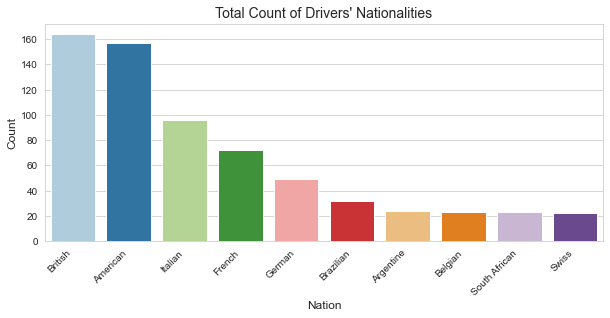

In [46]:
# Create a barplot
fig = plt.figure(figsize=(10,4))
ax = sns.barplot(data=nation_dist, x="nationality", y="count")
ax.set_xticks(range(len(nation_dist.nationality)))
ax.set_xticklabels(nation_dist.nationality, rotation=45, horizontalalignment="right")
plt.xlabel("Nation", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Total Count of Drivers' Nationalities", fontsize=14)
plt.show()

In [47]:
# Find out the drivers with the highest number of wins through the years
max_wins = full_drivers.groupby("name").wins.max().sort_values(ascending=False).nlargest(4).reset_index()
max_wins

,name,wins
0,Max Verstappen,15
1,Michael Schumacher,13
2,Sebastian Vettel,13
3,Lewis Hamilton,11


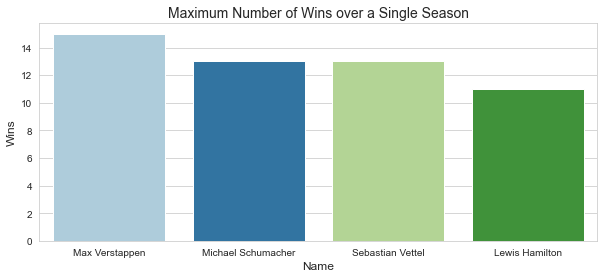

In [48]:
# Create a barplot
fig = plt.figure(figsize=(10,4))
ax = sns.barplot(data=max_wins, x="name", y="wins")
ax.set_xticks(range(len(max_wins.name)))
ax.set_xticklabels(max_wins.name)
plt.xlabel("Name", fontsize=12)
plt.ylabel("Wins", fontsize=12)
plt.title("Maximum Number of Wins over a Single Season", fontsize=14)
plt.show()

In [49]:
# Get the list of the names of the top 15 drivers for visualization focus
wins_name_list = list(max_wins.name)
print(wins_name_list)

['Max Verstappen', 'Michael Schumacher', 'Sebastian Vettel', 'Lewis Hamilton']


In [50]:
# Merge the top drivers & races most importart columns for the next steps
drivers_races = full_drivers.merge(full_races[["raceId", "circuitName", "year", "circuitRef", "country"]], on="raceId", how="left")
drivers_races

,driverId,driverRef,number,code,name,dob,nationality,raceId,points,position,wins,circuitName,year,circuitRef,country
0,1,hamilton,44,HAM,Lewis Hamilton,1985-01-07,British,18,10.0,1,1,Australian Grand Prix,2008,albert_park,Australia
1,1,hamilton,44,HAM,Lewis Hamilton,1985-01-07,British,19,14.0,1,1,Malaysian Grand Prix,2008,sepang,Malaysia
2,1,hamilton,44,HAM,Lewis Hamilton,1985-01-07,British,20,14.0,3,1,Bahrain Grand Prix,2008,bahrain,Bahrain
3,1,hamilton,44,HAM,Lewis Hamilton,1985-01-07,British,21,20.0,2,1,Spanish Grand Prix,2008,catalunya,Spain
4,1,hamilton,44,HAM,Lewis Hamilton,1985-01-07,British,22,28.0,3,1,Turkish Grand Prix,2008,istanbul,Turkey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33877,856,de_vries,45,DEV,Nyck de Vries,1995-02-06,Dutch,1092,2.0,21,0,Japanese Grand Prix,2022,suzuka,Japan
33878,856,de_vries,45,DEV,Nyck de Vries,1995-02-06,Dutch,1093,2.0,21,0,United States Grand Prix,2022,americas,USA
33879,856,de_vries,45,DEV,Nyck de Vries,1995-02-06,Dutch,1094,2.0,21,0,Mexico City Grand Prix,2022,rodriguez,Mexico
33880,856,de_vries,45,DEV,Nyck de Vries,1995-02-06,Dutch,1095,2.0,21,0,Brazilian Grand Prix,2022,interlagos,Brazil


In [51]:
# Find out wins total split by season/year
winners_by_year = drivers_races.groupby(["name", "year"]).wins.max().reset_index()
# Check an example
winners_by_year[winners_by_year.name == "Max Verstappen"]

,name,year,wins
2048,Max Verstappen,2015,0
2049,Max Verstappen,2016,1
2050,Max Verstappen,2017,2
2051,Max Verstappen,2018,2
2052,Max Verstappen,2019,3
2053,Max Verstappen,2020,2
2054,Max Verstappen,2021,10
2055,Max Verstappen,2022,15


Text(0.5, 0.98, 'Wins Gradation Over Time by Name')

<Figure size 864x432 with 0 Axes>

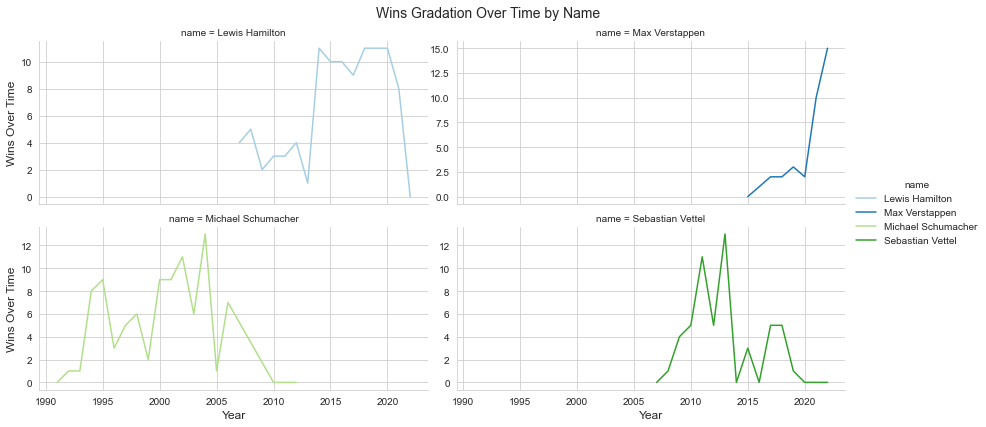

In [53]:
# Subset from the created winners list to visualize data
filted_winners = winners_by_year[winners_by_year.name.isin(wins_name_list)]

fig = plt.figure(figsize=(12,6))
ax = sns.FacetGrid(filted_winners, col="name", col_wrap=2, hue = "name", sharey = False, aspect=2)
ax = (ax.map(sns.lineplot, "year", "wins")
         .add_legend()
         .set_axis_labels("Year","Wins Over Time", fontsize=12))
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle("Wins Gradation Over Time by Name", fontsize=14)

In [70]:
# Find wins total for every driver 
winners_sum = drivers_races.groupby("name").wins.sum()\
                                            .sort_values(ascending=False).reset_index()
winners_sum.head(10)

,name,wins
0,Lewis Hamilton,1019
1,Michael Schumacher,849
2,Sebastian Vettel,517
3,Alain Prost,472
4,Ayrton Senna,394
5,Max Verstappen,361
6,Fernando Alonso,346
7,Nico Rosberg,269
8,Nigel Mansell,258
9,Niki Lauda,224


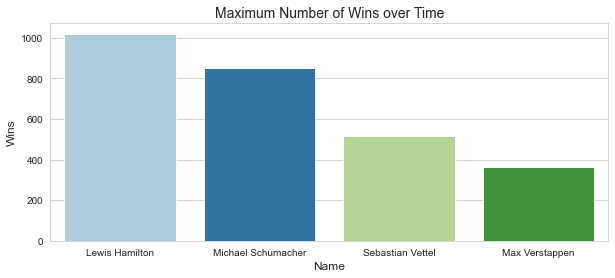

In [55]:
# Subset from the created winners list to visualize data
filted_winners = winners_sum[winners_sum.name.isin(wins_name_list)]
# Create a barplot
fig = plt.figure(figsize=(10,4))
ax = sns.barplot(data=filted_winners, x="name", y="wins")
plt.xlabel("Name", fontsize=12)
plt.ylabel("Wins", fontsize=12)
plt.title("Maximum Number of Wins over Time", fontsize=14)
plt.show()

In [56]:
# Get the breakdown of total points split by season/year
winners_by_points = drivers_races.groupby(["name", "year"]).points.max().reset_index()
# Check an example
winners_by_points[winners_by_points.name == "Max Verstappen"] 

,name,year,points
2048,Max Verstappen,2015,49.0
2049,Max Verstappen,2016,204.0
2050,Max Verstappen,2017,168.0
2051,Max Verstappen,2018,249.0
2052,Max Verstappen,2019,278.0
2053,Max Verstappen,2020,214.0
2054,Max Verstappen,2021,395.5
2055,Max Verstappen,2022,454.0


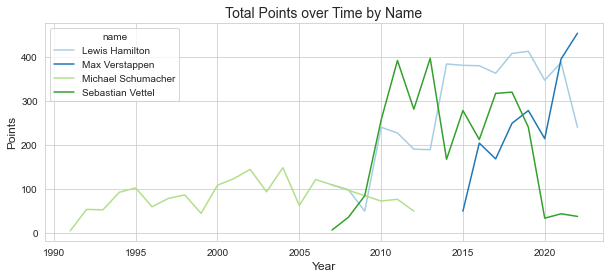

In [57]:
# Subset from the created winners list to visualize data
filted_winners = winners_by_points[winners_by_points.name.isin(wins_name_list)]
# Create a barplot
fig = plt.figure(figsize=(10,4))
ax = sns.lineplot(data=filted_winners, x="year", y="points", hue="name")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Points", fontsize=12)
plt.title("Total Points over Time by Name", fontsize=14)
plt.show()

In [58]:
# Get total points by year of each drivers
title_winners = drivers_races.groupby(["year", "name"]).points.max().reset_index()
# Sort by points and leave only final value of season/year
title_winners = title_winners.sort_values("points", ascending=False)\
                                .drop_duplicates("year", keep="first")
# Sort by year for easier perception
title_winners_by_year = title_winners.sort_values("year", ascending=False).reset_index(drop=True)
title_winners_by_year

,year,name,points
0,2022,Max Verstappen,454.0
1,2021,Max Verstappen,395.5
2,2020,Lewis Hamilton,347.0
3,2019,Lewis Hamilton,413.0
4,2018,Lewis Hamilton,408.0
...,...,...,...
68,1954,Juan Fangio,42.0
69,1953,Alberto Ascari,34.5
70,1952,Alberto Ascari,36.0
71,1951,Juan Fangio,31.0


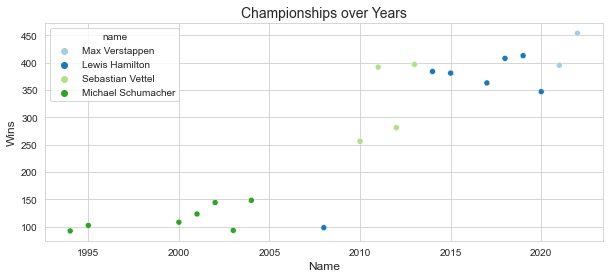

In [59]:
# Subset from the created winners list to visualize data
filted_winners = title_winners_by_year[title_winners_by_year.name.isin(wins_name_list)]
# Create a line plot
fig = plt.figure(figsize=(10,4))
ax = sns.scatterplot(x="year", y="points", hue="name", data=filted_winners)
plt.xlabel("Name", fontsize=12)
plt.ylabel("Wins", fontsize=12)
plt.title("Championships over Years", fontsize=14)
plt.show()


### Explore Correlation

Now, that we have answered some question by manipulating data and visualizing it, we can have a look at some stats and correlation between categories and wins.

In [60]:
# Calculate the total number for every Grand Prix ever held
circuits_count = drivers_races["circuitName"].value_counts().nlargest(10).reset_index()\
                                        .rename(columns={"index": "grand_prix", "circuitName": "count"})
circuits_count

,grand_prix,count
0,Italian Grand Prix,2980
1,British Grand Prix,2644
2,German Grand Prix,2447
3,Belgian Grand Prix,2240
4,French Grand Prix,2232
5,Monaco Grand Prix,1826
6,United States Grand Prix,1620
7,Canadian Grand Prix,1554
8,Spanish Grand Prix,1477
9,Dutch Grand Prix,1260


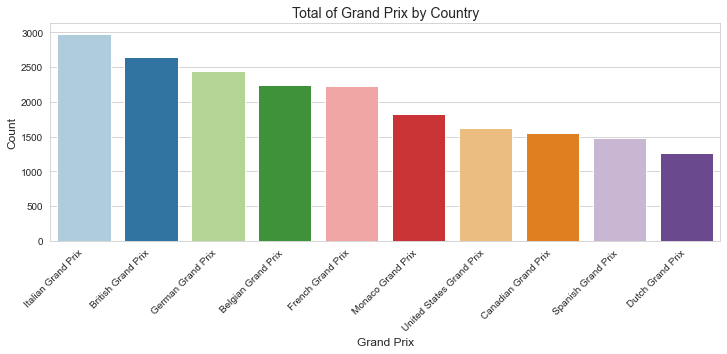

In [67]:
# Create a barplot
fig = plt.figure(figsize=(12,4))
ax = sns.barplot(data=circuits_count, x="grand_prix", y="count")
ax.set_xticks(range(len(circuits_count.grand_prix)))
ax.set_xticklabels(circuits_count.grand_prix, rotation=45, horizontalalignment="right")
plt.xlabel("Grand Prix", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Total of Grand Prix by Country", fontsize=14)
plt.show()

In [62]:
# Get the percentage distribution of countries holding races
country_dist = drivers_races["country"].value_counts(normalize=True).reset_index()\
                                        .rename(columns={"index": "country", "country": "percentage"})
country_dist.head(15)

,country,percentage
0,Italy,0.112685
1,USA,0.084765
2,Germany,0.082817
3,UK,0.081312
4,France,0.067056
5,Belgium,0.066112
6,Monaco,0.053893
7,Spain,0.049082
8,Canada,0.045865
9,Netherlands,0.037188


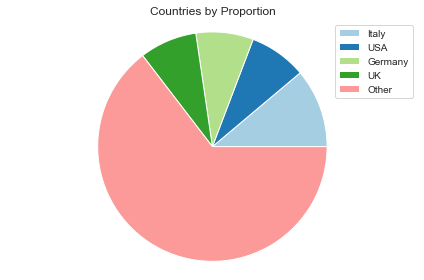

In [63]:
# Define Other category
sum = country_dist.percentage.iloc[4:].sum()
# Define data
pie_countries = ["Italy", "USA", "Germany", "UK", "Other"]
proportions = [0.11, 0.08, 0.08, 0.08, sum.astype(float)]
# Pie chart for Expenses
plt.pie(proportions, labels=None)
plt.title("Countries by Proportion")
plt.legend(pie_countries, loc="best")
plt.axis("Equal")
plt.tight_layout()

## Conclusions
1. Where do the most drivers come from? What countries have held the most grandprix?
- Most drivers come from the UK, the USA, Italy and France. Some other European countries, South Africa and South American also have made it to the Top10. An interesting observation is that Grand Prix and the countries holding them are also largely matching. 
2. Who has winned the most during one season?
- The dominating names are Max Verstappen(15), Michael Schumacher(13), Sebastian Vettel(13), and Lewis Hamilton(11).
3. How do wins change over years for them?
- Michael Schumacher has an unstable but long row of wins. Lewis Hamilton shows a spike and a rough decrease in 2020. Sebastian Vettel has a noticable decrease in 2014 after hanging the team. Max Vestappen's spike in 2020 continues till now.
4. How many World Championship titles do they have?
- The absolute champions are Lewis Hamilton(7) and Michael Schumacher(7) having the record-breaking number of titles. Sebastian Vettel(4) comes next and Max Vestappen(2) is catching up.
5. How do their winning points change over years?
- Michael Schumacher points roughly range from 100 to 150 over the years. Sebastian Vettel's - from 250 to 400. Lewis Hamilton's - from 100 to 410. Max Vestappen's - from 400 to 550. An important note is that the rules have been changing so the actual difference doesn't relate to the actual skills of the drivers. From the graph, we can assume a major score reconsideration happenned between 2008 and 2010.
6. Who are the most experienced drivers?
- Among the title owners, Lewis Hamilton(1019) has the biggest amount of wins throughout his career. Michael Schumacher(849) and Sebastian Vettel(517) both have finished racing taking the next lines. Max Vestappen(361) is showing great results, conceding only to two legends from the 20th cenctury.

#### To be Continued...
The following questions might be answered with statistical methods as a part of further investigation.

7. Who is the youngest to win a race? A title?
8. Is age significant for winning a race?
9. What are the dominant teams on the grid?
10. Is a team significant for winning a champion title?